In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import argparse
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
print("[INFO] loading face embeddings...")
data = pickle.loads(open('embeddings.pickle', "rb").read())

[INFO] loading face embeddings...


In [4]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras import backend as K
from keras import optimizers

Using TensorFlow backend.


In [39]:
left_input=Input(shape=(1,128))
right_input=Input(shape=(1,128))
model=Sequential()
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32, activation='sigmoid'))
encoded_L=model(left_input)
encoded_R=model(right_input)
L1_layer=Lambda(lambda tensors:K.abs(tensors[0]-tensors[1]))
L1_distance=L1_layer([encoded_L,encoded_R])
prediction= Dense(1,activation='sigmoid')(L1_distance)
siamese_net=Model(inputs=[left_input,right_input],output=prediction)
siamese_net.compile(loss='binary_crossentropy',metrics=['acc'],optimizer='Adam')
siamese_net.summary()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 1, 128)       0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 1, 128)       0                                            
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 1, 32)        26848       input_9[0][0]                    
                                                                 input_10[0][0]                   
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 1, 32)        0           sequential_5[1][0]         

C:\Users\Om\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  if sys.path[0] == '':


from random import randint
import numpy as np
def random_pair(data):
    y_train=np.zeros((1000,1))
    left_input=[]
    right_input=[]
    for count in range(1000):
        left=randint(0,49)
        right=randint(0,49)
        if(right!=left):
            if(data['names'][left]==data['names'][right]):
                y_train[count]=1
            else:
                y_train[count]=0
            if count==0:
                left_input=data['embeddings'][left]
                right_input=data['embeddings'][right]
            else:
                left_input=np.vstack((left_input,data['embeddings'][left]))
                right_input=np.vstack((right_input,data['embeddings'][right]))
        else:
            count=count-1
            continue
    return left_input,right_input,y_train

In [40]:
import numpy as np

In [41]:
def random_pair(data):
    y_train=np.zeros((2500,1))
    left_input=[]
    right_input=[]
    count=0
    for left in range(50):
        for right in range(50):
            if(data['names'][left]==data['names'][right]):
                y_train[count]=1
            else:
                y_train[count]=0
            if count==0:
                left_input=data['embeddings'][left]
                right_input=data['embeddings'][right]
            else:
                left_input=np.vstack((left_input,data['embeddings'][left]))
                right_input=np.vstack((right_input,data['embeddings'][right]))
            count=count+1
    return left_input,right_input,y_train

In [42]:
left_input,right_input,y_train=random_pair(data)
left_input.shape

(2500, 128)

In [43]:
left_input_reshape=left_input.reshape(left_input.shape[0],1,128)
right_input_reshape=right_input.reshape(right_input.shape[0],1,128)

In [44]:
y_train_cut=np.delete(y_train,np.s_[right_input_reshape.shape[0]:],0)
y_train_reshape=y_train_cut.reshape(right_input_reshape.shape[0],1,1)

Train on 2000 samples, validate on 500 samples
Epoch 1/500
2000/2000 [==============================] - 2s 958us/step - loss: 0.6647 - acc: 0.7750 - val_loss: 0.6435 - val_acc: 0.8000
Epoch 2/500
2000/2000 [==============================] - 0s 47us/step - loss: 0.5944 - acc: 0.8000 - val_loss: 0.5875 - val_acc: 0.8000
Epoch 3/500
2000/2000 [==============================] - 0s 41us/step - loss: 0.5115 - acc: 0.8000 - val_loss: 0.5285 - val_acc: 0.8000
Epoch 4/500
2000/2000 [==============================] - ETA: 0s - loss: 0.4614 - acc: 0.785 - 0s 28us/step - loss: 0.4330 - acc: 0.8000 - val_loss: 0.4794 - val_acc: 0.8000
Epoch 5/500
2000/2000 [==============================] - 0s 28us/step - loss: 0.3756 - acc: 0.8000 - val_loss: 0.4422 - val_acc: 0.8000
Epoch 6/500
2000/2000 [==============================] - 0s 30us/step - loss: 0.3352 - acc: 0.8000 - val_loss: 0.4143 - val_acc: 0.8000
Epoch 7/500
2000/2000 [==============================] - 0s 31us/step - loss: 0.3063 - acc: 0.8000

2000/2000 [==============================] - 0s 30us/step - loss: 0.1099 - acc: 1.0000 - val_loss: 0.3564 - val_acc: 0.8320
Epoch 61/500
2000/2000 [==============================] - 0s 37us/step - loss: 0.1084 - acc: 0.9995 - val_loss: 0.3454 - val_acc: 0.8320
Epoch 62/500
2000/2000 [==============================] - 0s 36us/step - loss: 0.1072 - acc: 0.9995 - val_loss: 0.3683 - val_acc: 0.8320
Epoch 63/500
2000/2000 [==============================] - 0s 33us/step - loss: 0.1058 - acc: 1.0000 - val_loss: 0.3463 - val_acc: 0.8400
Epoch 64/500
2000/2000 [==============================] - 0s 32us/step - loss: 0.1044 - acc: 1.0000 - val_loss: 0.3597 - val_acc: 0.8400
Epoch 65/500
2000/2000 [==============================] - 0s 32us/step - loss: 0.1030 - acc: 1.0000 - val_loss: 0.3541 - val_acc: 0.8440
Epoch 66/500
2000/2000 [==============================] - 0s 30us/step - loss: 0.1017 - acc: 0.9995 - val_loss: 0.3428 - val_acc: 0.8400
Epoch 67/500
2000/2000 [==============================

Epoch 120/500
2000/2000 [==============================] - 0s 34us/step - loss: 0.0557 - acc: 1.0000 - val_loss: 0.2433 - val_acc: 0.9240
Epoch 121/500
2000/2000 [==============================] - 0s 30us/step - loss: 0.0555 - acc: 1.0000 - val_loss: 0.2503 - val_acc: 0.9240
Epoch 122/500
2000/2000 [==============================] - 0s 36us/step - loss: 0.0546 - acc: 1.0000 - val_loss: 0.2467 - val_acc: 0.9200
Epoch 123/500
2000/2000 [==============================] - 0s 34us/step - loss: 0.0544 - acc: 1.0000 - val_loss: 0.2503 - val_acc: 0.9240
Epoch 124/500
2000/2000 [==============================] - 0s 32us/step - loss: 0.0539 - acc: 1.0000 - val_loss: 0.2397 - val_acc: 0.9240
Epoch 125/500
2000/2000 [==============================] - 0s 33us/step - loss: 0.0535 - acc: 1.0000 - val_loss: 0.2417 - val_acc: 0.9240
Epoch 126/500
2000/2000 [==============================] - 0s 30us/step - loss: 0.0530 - acc: 1.0000 - val_loss: 0.2404 - val_acc: 0.9240
Epoch 127/500
2000/2000 [=========

2000/2000 [==============================] - 0s 38us/step - loss: 0.0364 - acc: 1.0000 - val_loss: 0.2082 - val_acc: 0.9560
Epoch 180/500
2000/2000 [==============================] - 0s 41us/step - loss: 0.0361 - acc: 1.0000 - val_loss: 0.2070 - val_acc: 0.9560
Epoch 181/500
2000/2000 [==============================] - 0s 42us/step - loss: 0.0360 - acc: 1.0000 - val_loss: 0.2102 - val_acc: 0.9520
Epoch 182/500
2000/2000 [==============================] - 0s 40us/step - loss: 0.0358 - acc: 1.0000 - val_loss: 0.1969 - val_acc: 0.9640
Epoch 183/500
2000/2000 [==============================] - 0s 42us/step - loss: 0.0355 - acc: 1.0000 - val_loss: 0.2021 - val_acc: 0.9640
Epoch 184/500
2000/2000 [==============================] - 0s 44us/step - loss: 0.0352 - acc: 1.0000 - val_loss: 0.2102 - val_acc: 0.9520
Epoch 185/500
2000/2000 [==============================] - 0s 41us/step - loss: 0.0351 - acc: 1.0000 - val_loss: 0.2074 - val_acc: 0.9560
Epoch 186/500
2000/2000 [=======================

2000/2000 [==============================] - 0s 42us/step - loss: 0.0263 - acc: 1.0000 - val_loss: 0.1923 - val_acc: 0.9640
Epoch 239/500
2000/2000 [==============================] - 0s 45us/step - loss: 0.0263 - acc: 1.0000 - val_loss: 0.2034 - val_acc: 0.9560
Epoch 240/500
2000/2000 [==============================] - 0s 44us/step - loss: 0.0262 - acc: 1.0000 - val_loss: 0.1906 - val_acc: 0.9640
Epoch 241/500
2000/2000 [==============================] - 0s 44us/step - loss: 0.0260 - acc: 1.0000 - val_loss: 0.1959 - val_acc: 0.9640
Epoch 242/500
2000/2000 [==============================] - 0s 45us/step - loss: 0.0258 - acc: 1.0000 - val_loss: 0.1953 - val_acc: 0.9560
Epoch 243/500
2000/2000 [==============================] - 0s 40us/step - loss: 0.0257 - acc: 1.0000 - val_loss: 0.1982 - val_acc: 0.9640
Epoch 244/500
2000/2000 [==============================] - 0s 43us/step - loss: 0.0256 - acc: 1.0000 - val_loss: 0.1914 - val_acc: 0.9640
Epoch 245/500
2000/2000 [=======================

2000/2000 [==============================] - 0s 31us/step - loss: 0.0200 - acc: 1.0000 - val_loss: 0.1875 - val_acc: 0.9640
Epoch 298/500
2000/2000 [==============================] - 0s 33us/step - loss: 0.0199 - acc: 1.0000 - val_loss: 0.1916 - val_acc: 0.9640
Epoch 299/500
2000/2000 [==============================] - 0s 41us/step - loss: 0.0199 - acc: 1.0000 - val_loss: 0.1918 - val_acc: 0.9640
Epoch 300/500
2000/2000 [==============================] - 0s 33us/step - loss: 0.0198 - acc: 1.0000 - val_loss: 0.1871 - val_acc: 0.9640
Epoch 301/500
2000/2000 [==============================] - 0s 33us/step - loss: 0.0197 - acc: 1.0000 - val_loss: 0.1850 - val_acc: 0.9640
Epoch 302/500
2000/2000 [==============================] - 0s 31us/step - loss: 0.0197 - acc: 1.0000 - val_loss: 0.1862 - val_acc: 0.9640
Epoch 303/500
2000/2000 [==============================] - 0s 35us/step - loss: 0.0196 - acc: 1.0000 - val_loss: 0.1872 - val_acc: 0.9640
Epoch 304/500
2000/2000 [=======================

2000/2000 [==============================] - 0s 28us/step - loss: 0.0157 - acc: 1.0000 - val_loss: 0.1806 - val_acc: 0.9640
Epoch 357/500
2000/2000 [==============================] - 0s 32us/step - loss: 0.0156 - acc: 1.0000 - val_loss: 0.1841 - val_acc: 0.9640
Epoch 358/500
2000/2000 [==============================] - 0s 34us/step - loss: 0.0155 - acc: 1.0000 - val_loss: 0.1863 - val_acc: 0.9640
Epoch 359/500
2000/2000 [==============================] - 0s 32us/step - loss: 0.0156 - acc: 1.0000 - val_loss: 0.1818 - val_acc: 0.9640
Epoch 360/500
2000/2000 [==============================] - 0s 35us/step - loss: 0.0155 - acc: 1.0000 - val_loss: 0.1807 - val_acc: 0.9640
Epoch 361/500
2000/2000 [==============================] - 0s 32us/step - loss: 0.0154 - acc: 1.0000 - val_loss: 0.1864 - val_acc: 0.9640
Epoch 362/500
2000/2000 [==============================] - 0s 34us/step - loss: 0.0154 - acc: 1.0000 - val_loss: 0.1870 - val_acc: 0.9640
Epoch 363/500
2000/2000 [=======================

2000/2000 [==============================] - 0s 30us/step - loss: 0.0125 - acc: 1.0000 - val_loss: 0.1709 - val_acc: 0.9640
Epoch 416/500
2000/2000 [==============================] - 0s 31us/step - loss: 0.0124 - acc: 1.0000 - val_loss: 0.1799 - val_acc: 0.9640
Epoch 417/500
2000/2000 [==============================] - 0s 36us/step - loss: 0.0124 - acc: 1.0000 - val_loss: 0.1741 - val_acc: 0.9640
Epoch 418/500
2000/2000 [==============================] - 0s 32us/step - loss: 0.0125 - acc: 1.0000 - val_loss: 0.1811 - val_acc: 0.9640
Epoch 419/500
2000/2000 [==============================] - 0s 30us/step - loss: 0.0124 - acc: 1.0000 - val_loss: 0.1708 - val_acc: 0.9640
Epoch 420/500
2000/2000 [==============================] - 0s 31us/step - loss: 0.0123 - acc: 1.0000 - val_loss: 0.1652 - val_acc: 0.9640
Epoch 421/500
2000/2000 [==============================] - 0s 32us/step - loss: 0.0122 - acc: 1.0000 - val_loss: 0.1761 - val_acc: 0.9640
Epoch 422/500
2000/2000 [=======================

2000/2000 [==============================] - 0s 28us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 0.1618 - val_acc: 0.9640
Epoch 475/500
2000/2000 [==============================] - 0s 31us/step - loss: 0.0096 - acc: 1.0000 - val_loss: 0.1420 - val_acc: 0.9640
Epoch 476/500
2000/2000 [==============================] - 0s 34us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.1437 - val_acc: 0.9640
Epoch 477/500
2000/2000 [==============================] - 0s 35us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.1481 - val_acc: 0.9640
Epoch 478/500
2000/2000 [==============================] - 0s 33us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 0.1453 - val_acc: 0.9640
Epoch 479/500
2000/2000 [==============================] - 0s 34us/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.1414 - val_acc: 0.9640
Epoch 480/500
2000/2000 [==============================] - 0s 36us/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.1406 - val_acc: 0.9640
Epoch 481/500
2000/2000 [=======================

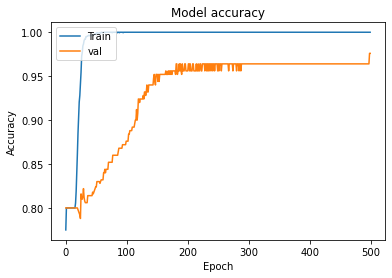

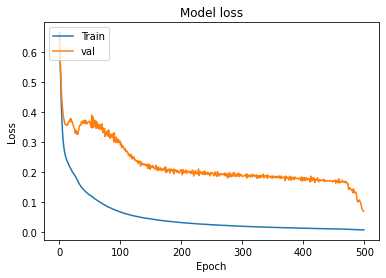

In [45]:
EPOCH=500
BATCH=256

history=siamese_net.fit([left_input_reshape,right_input_reshape],y_train_reshape,epochs=EPOCH,batch_size=BATCH,validation_split=0.2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [46]:
# write the actual face recognition model to disk
f = open("recognizer_siamese.pickle", "wb")
f.write(pickle.dumps(siamese_net))
f.close()